# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Load data

In [ ]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


### Helper functions for the next questions

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

RAND = 42

def create_run_evaluate(scale = None, pca = None, classifier = None, output = True):
    '''create a pipeline from the passed params, fit it and evaluate on test set'''
    
    pipeline = make_pipeline(scale, pca, classifier)
    pipeline.fit(X_train, y_train)
    
    return pipeline, evaluate_model(pipeline, output);

def evaluate_model(classifier, output = True):
    '''calculate accuracy of classifier based on test set'''
    
    y_test_pred = classifier.predict(X_test)
    y_train_pred = classifier.predict(X_train)
    
    train_acc_score = accuracy_score(y_train, y_train_pred)
    test_acc_score = accuracy_score(y_test, y_test_pred)
    
    
    if output:
        print(f'Model accuracy (Train) {train_acc_score:.3f}')        
        print(f'Model accuracy (Test) {test_acc_score:.3f}')

    return round(test_acc_score,5)

# PCA + SVM


**Task 1**: Use X_train, y_train to train a SVM (SKlearn's SVC) with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Make sure you normailize the data by using StandardScaler.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [ ]:
create_run_evaluate(scale = StandardScaler(), classifier = SVC());

Model accuracy (Train) 1.000
Model accuracy (Test) 0.986


**Task 2**: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

*Q1*: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of SVM + PCA.

In [ ]:
create_run_evaluate(StandardScaler(), PCA(), SVC());

Model accuracy (Train) 1.000
Model accuracy (Test) 0.986


*Q2*: Did the results improve\stayed the same\got worse? 

<font color='blue'>same</font>

# PCA + logistic regression

**Task 3**: repeat task 1 with logistic regression.

In [ ]:
create_run_evaluate(scale = StandardScaler(), classifier = LogisticRegression());

Model accuracy (Train) 1.000
Model accuracy (Test) 0.986


**Task 4**: repeast task 2 with logistic regression.

In [ ]:
create_run_evaluate(StandardScaler(), PCA(), LogisticRegression());

Model accuracy (Train) 1.000
Model accuracy (Test) 0.986


*Q3*: Did the results improved\stayed the same\got worse?

<font color='blue'> same </font>

*Q4*: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of SVM from it. Hint: SVM assumes the data can be separated by an hyperplane.

<font color='blue'> For the SVM and Logistic regression the results are the same for the cases of using PCA and not using PCA (due to the linear nature of separation in SVM and Logistic regression and the linearity of PCA transformation). If we take a look on the non-linear algorithms, such as GaussianNB or RandomForestClassifier, the results will be different.</font>

# PCA + GaussianNB

In [ ]:
create_run_evaluate(scale = StandardScaler(), classifier = GaussianNB());

Model accuracy (Train) 0.991
Model accuracy (Test) 0.972


In [ ]:
create_run_evaluate(StandardScaler(), PCA(), GaussianNB());

Model accuracy (Train) 0.991
Model accuracy (Test) 0.931


# PCA + RandomForestClassifier

In [ ]:
create_run_evaluate(scale = StandardScaler(), classifier = RandomForestClassifier(random_state=RAND));

Model accuracy (Train) 1.000
Model accuracy (Test) 0.986


In [ ]:
create_run_evaluate(StandardScaler(), PCA(), RandomForestClassifier(random_state=RAND));

Model accuracy (Train) 1.000
Model accuracy (Test) 0.931


# Visualizing

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f21b6456f2cb9bd04589fd6c346c9dd6ad190e2e91c657168fc0539359ca25bd
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=0e9e30327cb67c6038b7dae65957cb358eff75b3cd5a0c26ed0f5ea80e1af44c
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from umap import UMAP

In [ ]:
number_of_neighboors=[5,10,20,30,50,100]
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
def visualize(model_type):
    fig, axes = plt.subplots(2,3, figsize=(20,12))

    for index in range(len(number_of_neighboors)):
        plt.figure(1,figsize=(4,4))
        plt.subplot(2, 3, index+1)

        neighboors_size = number_of_neighboors[index]
        
        if model_type == 'LLE':
            model = LocallyLinearEmbedding(n_neighbors=neighboors_size, n_components=2,random_state=RAND)
        elif model_type == 'TSNE':
            model = TSNE(perplexity=neighboors_size, random_state=RAND)
        elif model_type == 'UMAP':
            model = UMAP(n_neighbors=neighboors_size,random_state=RAND)
        else:
            print('Model type not described')
            break
        X_transformed = model.fit_transform(X_norm)

        sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1], hue=y, palette=["red","green","blue"])
        plt.title(f"{model_type} with {neighboors_size} neighboors")

**Task 5**: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimize the n_neighbors by running at least 5 times and use the best looking result you can find.

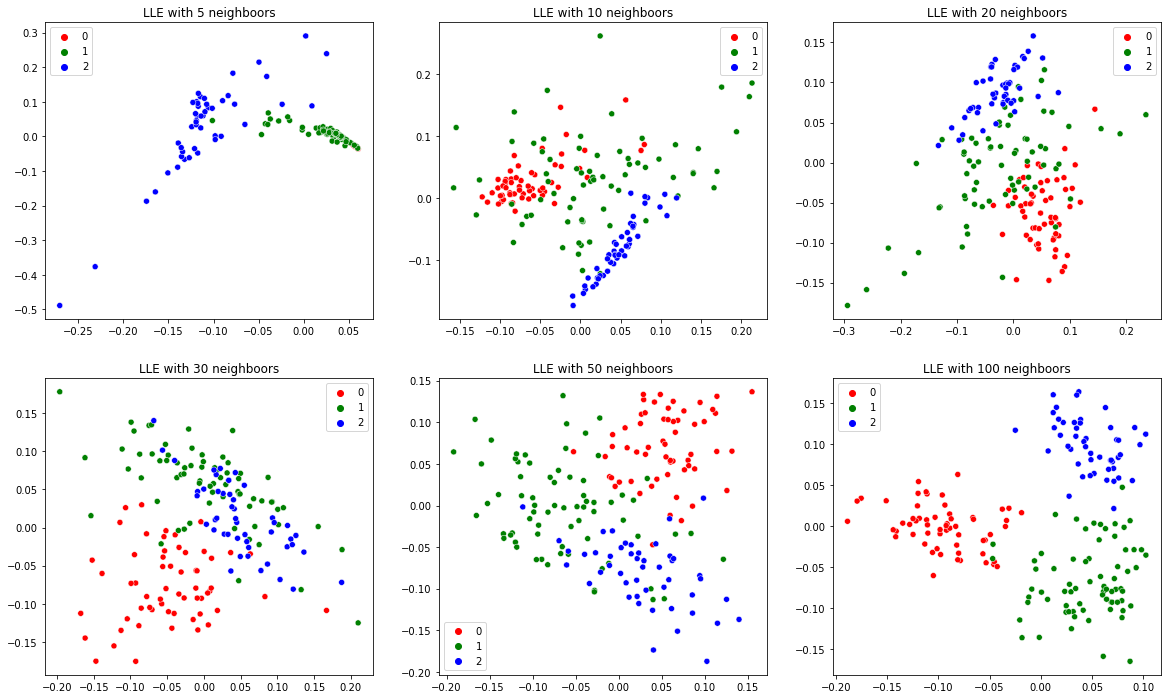

In [ ]:
visualize('LLE')

**Task 6**: Use t-SNE to visualize the data. Plot the results.

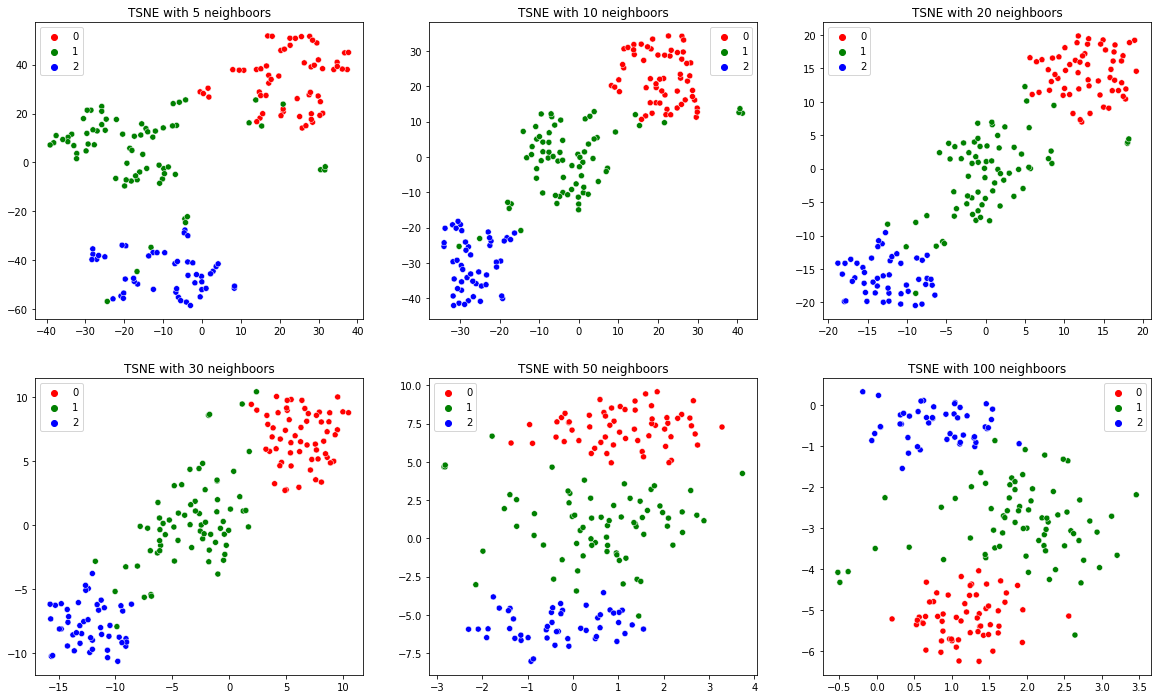

In [ ]:
visualize('TSNE')

**Task 7**: Use UMAP to visualize the data. Plot the results.

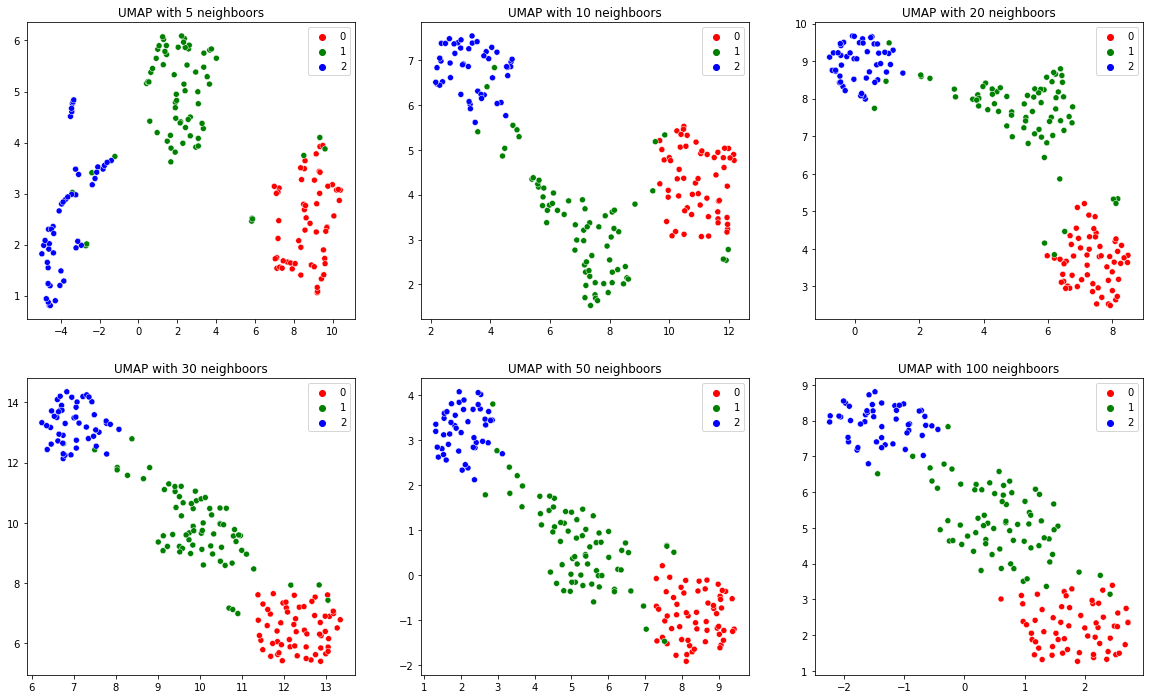

In [ ]:
visualize('UMAP')

*Q5*: If we run one of this visualizing algorithms various times with the default parameters, are we guranteed to see the same results? Why?

<font color='blue'> The algorithms are not deterministic: 
* LLE algorithm is deterministic, but there are the parameters in sklearn implementation (the 'arpack' as an eigen_solver) which add randomness;
* In tSNE, there's a random initialization of the low-dimensional embedding and the optimization process is stochastic by its nature;
* In UMAP, the stochastic gradient descent is used.

To reproduce the same results use the *random_state* argument.</font>